### Desenvolver um modelo de classificação capaz de identificar pacientes com alto risco de sofrer um ataque cardíaco utilizando o algoritmo Random Forest

#### Legenda do dataset
- **age (Idade)**: a idade do paciente em anos.

- **sex (Sexo)**: o sexo do paciente (0: feminino, 1: masculino).

- **cp (Chest Pain Type) - (Tipo de Dor no Peito)**: um atributo categórico que descreve o tipo de dor no peito relatada pelo paciente.
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    
-  **trtbps: (Resting Blood Pressure) - (Pressão Arterial em Repouso)**: a pressão arterial em repouso do paciente (em mmHg).

- **chol: (Cholesterol) - (Colesterol)**: o nível de colesterol do paciente em mg/dL.

- **fbs: (Fasting Blood Sugar) - (Açúcar no Sangue em Jejum)**: um atributobinário indicando se o nível de açúcar no sangue em jejum está acima de 120 mg/dL.
    - 1: sim
    - 0: não
    
- **restecg: (Resting Electrocardiographic Results) - (Resultados Eletrocardiográficos em Repouso)**: um atributo categórico que descreve os resultados eletrocardiográficos em repouso.
    - Value 0: mostrando hipertrofia ventricular esquerda provável ou definitiva
    - Value 1: normal
    - Value 2: tendo anormalidade da onda ST-T (inversões da onda T e/ou ST)

- **thalachh (Maximum Heart Rate Achieved) - (Frequência Cardíaca Máxima Alcançada)**: a frequência cardíaca máxima alcançada durante o teste de estresse.
- **exng**: (Exercise Induced Angina) - (Angina Induzida por Exercício): um atributo binário indicando se houve angina induzida pelo exercício)
    - 1: sim
    - 0: não
    
- **oldpeak**: (ST Depression Induced by Exercise Relative to Rest)(Depressão do Segmento ST Induzida por Exercício em Relação ao Repouso): a alteração no segmento ST induzida pelo exercício em relação ao repouso.

- **slp**: (Slope of the Peak Exercise ST Segment) - (Inclinação do Segmento ST de Pico de Exercício): a inclinação do segmento ST de pico durante o exercício.

- **caa**: (Number of Major Vessels (0-3) Colored by Fluoroscopy) - (Número de Principais Vasos Coloridos por Fluoroscopia): o número de principais vasos sanguíneos coloridos por fluoroscopia (0-3).

- **thall**: (Thalassemia) - (Talassemia): um atributo categórico que descreve o tipo de talassemia.
    - 0: NULL (dropped from the dataset previously)
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
    
- **output**: chance de ter um ataque cardíaco.
    - 0= less chance of heart attack
    - 1= more chance of heart attack


In [70]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler, TomekLinks #vPara Balanceamento de dados
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
df  = pd.read_csv('heart.csv', sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       342 non-null    int64  
 1   sex       342 non-null    int64  
 2   cp        342 non-null    int64  
 3   trtbps    342 non-null    int64  
 4   chol      342 non-null    int64  
 5   fbs       342 non-null    int64  
 6   restecg   342 non-null    int64  
 7   thalachh  342 non-null    int64  
 8   exng      342 non-null    int64  
 9   oldpeak   342 non-null    float64
 10  slp       342 non-null    int64  
 11  caa       342 non-null    int64  
 12  thall     342 non-null    int64  
 13  output    342 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 37.5 KB


In [14]:
#verificando se ha dados duplicados
print(df.duplicated().any())
# Contar o número de duplicatas
num_duplicatas = df.duplicated().sum()
print("Número de duplicatas:", num_duplicatas)

True
Número de duplicatas: 40


In [15]:
df_sem_duplicatas = df.drop_duplicates()
df_sem_duplicatas

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
#verificando se está balanceado
df_sem_duplicatas.groupby(['output'])['output'].count()

output
0    138
1    164
Name: output, dtype: int64

In [43]:
#Qual é o desvio padrão das idades dos pacientes?
df_sem_duplicatas.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
#separando conjunto de dados de features e target
X_dados = df_sem_duplicatas.drop('output',axis=1).values
y_dados = df_sem_duplicatas['output'].values

In [21]:
#Balanceando os dados utlizando UnderSampler- reduz o numero de observações da classe majoritária
def balanceamento(X,y):
    undersample = RandomUnderSampler(random_state = 42)
    X_under,y_under = undersample.fit_resample(X,y)
    tl = TomekLinks(sampling_strategy='all') #outliers
    X_under,y_under = tl.fit_resample(X_under,y_under)
    return X_under,y_under

In [22]:
X_dados_balanceados, y_dados_balanceados = balanceamento(X_dados,y_dados)

In [23]:
print(len(X_dados_balanceados),len(y_dados_balanceados))

220 220


In [25]:
import collections
print(collections.Counter(y_dados_balanceados)) #classes balanceadas

Counter({0: 110, 1: 110})


In [26]:
def separar_treino_teste(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                    random_state=42, test_size=0.2)
    return X_train,X_test,y_train,y_test


In [27]:
X_train,X_test,y_train,y_test = separar_treino_teste(X_dados_balanceados,y_dados_balanceados)

In [42]:
print(len(X_test),len(X_train))

44 176


In [34]:
#criando modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
#instanciando
classifier =RandomForestClassifier(random_state=42)
#criando modelo
modelo = classifier.fit(X_train,y_train)
#realiza predições
y_pred = modelo.predict(X_test)

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [39]:
#Importancia de cada Feature
pd.DataFrame(modelo.feature_importances_,columns = ['Importância'],
            index = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']).sort_values("Importância",ascending =False)

,Importância
thalachh,0.126951
cp,0.125280
caa,0.120775
thall,0.117353
oldpeak,0.109878
age,0.079217
chol,0.079063
trtbps,0.072934
exng,0.056606
slp,0.056349


In [40]:
#acurácia
acuracia = accuracy_score(y_test,y_pred)
print('Precisão',acuracia)

Precisão 0.8409090909090909


In [52]:
#Crie o algoritmo de Random forest com os seguintes parâmetros: (random_state=42, n_estimators=100, max_depth=100)
#Qual a feature de maior importância?
#instanciando
classifier2 =RandomForestClassifier(random_state=42,n_estimators=100, max_depth=100)
#criando modelo
modelo2 = classifier2.fit(X_train,y_train)
#realiza predições
y_pred2 = modelo2.predict(X_test)
#Importancia de cada Feature
pd.DataFrame(modelo2.feature_importances_,columns = ['Importância'],
            index = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']).sort_values("Importância",ascending =False)

,Importância
thalachh,0.126951
cp,0.125280
caa,0.120775
thall,0.117353
oldpeak,0.109878
age,0.079217
chol,0.079063
trtbps,0.072934
exng,0.056606
slp,0.056349


In [49]:
#acurácia é o percentual de acertos, ou seja, razão entre acertos e total de entrada
acuracia2 = accuracy_score(y_test,y_pred2)
print('Precisão',acuracia2)

Precisão 0.8409090909090909


In [51]:
# Um novo paciente acabou de dar entrada no hospital com os seguintes atributos: [[33,1,3,50,233,1,0,150,0,2.3,0,0,1]].  
# Cada atributo representa as variáveis utilizadas no modelo. Por exemplo age = 33, sex= 1 
modelo2.predict([[33,1,3,50,233,1,0,150,0,2.3,0,0,1]])

array([1], dtype=int64)

## Métricas
### Matriz de confusão

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Explicando as métricas
<img src = "recall_c.png">
<img src = "precisao.png">
<img src = "f_measure.png">
<img src = "especifi.png">

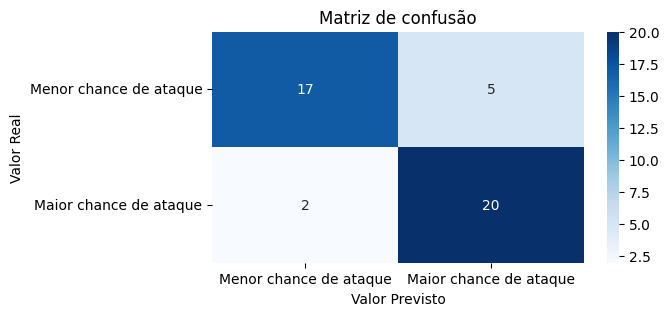

In [60]:
cm = confusion_matrix(y_test,y_pred2)
labels = ['Menor chance de ataque','Maior chance de ataque']
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
           annot=True,
           cmap='Blues',
           xticklabels=labels,
           yticklabels=labels)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')
plt.show()

In [63]:
#relatorio de classificação
report = classification_report(y_test,y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.80      0.91      0.85        22

    accuracy                           0.84        44
   macro avg       0.85      0.84      0.84        44
weighted avg       0.85      0.84      0.84        44



In [69]:
#verificando a correlação entre as features
correlation = df_sem_duplicatas.corr() 
correlation  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146
